In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

loan = pd.read_csv("C:\\Users\\DHRUBAJIT\\Desktop\\AnalyticsVidhya\\Loan Prediction 3\\New_loan.csv")

### 1. Taking all features

In [2]:
X = loan.drop(['Loan_Status'], axis=1)
y = loan.Loan_Status

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier

models = []
models.append(('LR',LogisticRegression()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('SVC',SVC()))
models.append(('TREE',DecisionTreeClassifier()))
models.append(('FOREST',RandomForestClassifier()))
models.append(('BAGGING',BaggingClassifier()))
models.append(('Boost',GradientBoostingClassifier()))
models.append(('NB',GaussianNB()))
models.append(('Ada',AdaBoostClassifier()))
models.append(('mlp',MLPClassifier()))
models.append(('gpc',GaussianProcessClassifier()))

train_accuracy = []
test_accuracy = []
error = []
names = []
for name,model in models:
    xtrain,xtest,ytrain,ytest = train_test_split(X,y, test_size=0.3, random_state=0)
    model.fit(xtrain,ytrain)
    model_pred = model.predict(xtest)
    train_accu = model.score(xtrain,ytrain)
    test_accu = model.score(xtest,ytest)
    rmse = np.sqrt(mean_squared_error(ytest,model_pred))
    train_accuracy.append(train_accu)
    test_accuracy.append(test_accu)
    error.append(rmse)
    names.append(name)
    a = pd.DataFrame(train_accuracy)
    b = pd.DataFrame(test_accuracy)
    c = pd.DataFrame(error)
    print("%s : %f  ,  %f  ,  (%f)" %(name, train_accu, test_accu, rmse))

LR : 0.811856  ,  0.838323  ,  (0.402090)
KNN : 0.817010  ,  0.790419  ,  (0.457800)
SVC : 0.819588  ,  0.832335  ,  (0.409469)
TREE : 1.000000  ,  0.712575  ,  (0.536120)
FOREST : 0.994845  ,  0.766467  ,  (0.483252)
BAGGING : 0.992268  ,  0.766467  ,  (0.483252)
Boost : 0.922680  ,  0.796407  ,  (0.451213)
NB : 0.811856  ,  0.838323  ,  (0.402090)
Ada : 0.855670  ,  0.790419  ,  (0.457800)


C:\Users\DHRUBAJIT\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


mlp : 0.842784  ,  0.808383  ,  (0.437741)
gpc : 0.912371  ,  0.748503  ,  (0.501495)


### 2. Recursive Feature Elimination

In [7]:
from sklearn.feature_selection import RFE
lrr = LogisticRegression()
rfe = RFE(lrr)
rfe.fit(X,y)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
  n_features_to_select=None, step=1, verbose=0)

In [12]:
print(rfe.support_)
selected = X[:,rfe.support_]
print ("")
print ("Selected Feature Matrix Shape")
print (selected.shape)

[False  True False  True False False  True  True  True False False]

Selected Feature Matrix Shape
(555, 5)


In [17]:
models2 = []
models2.append(('LR',LogisticRegression()))
models2.append(('KNN',KNeighborsClassifier()))
models2.append(('SVC',SVC()))
models2.append(('NB',GaussianNB()))
models2.append(('gpc',GaussianProcessClassifier()))
models2.append(('mlp',MLPClassifier()))
models2.append(('TREE',DecisionTreeClassifier()))
models2.append(('FOREST',RandomForestClassifier()))
models2.append(('BAGGING',BaggingClassifier()))
models2.append(('Boost',GradientBoostingClassifier()))
models2.append(('Ada',AdaBoostClassifier()))


train_accuracy2 = []
test_accuracy2 = []
error2 = []
names2 = []
for name,model in models2:
    xtr,xte,ytr,yte = train_test_split(selected,y, test_size=0.3, random_state=0)
    model.fit(xtr,ytr)
    model_pred = model.predict(xte)
    train_accu = model.score(xtr,ytr)
    test_accu = model.score(xte,yte)
    rmse = np.sqrt(mean_squared_error(yte,model_pred))
    train_accuracy2.append(train_accu)
    test_accuracy2.append(test_accu)
    error2.append(rmse)
    names2.append(name)
    print("%s : %f  ,  %f  ,  (%f)" %(name, train_accu, test_accu, rmse))

LR : 0.811856  ,  0.838323  ,  (0.402090)
KNN : 0.829897  ,  0.796407  ,  (0.451213)
SVC : 0.814433  ,  0.838323  ,  (0.402090)
NB : 0.811856  ,  0.838323  ,  (0.402090)
gpc : 0.827320  ,  0.826347  ,  (0.416717)


C:\Users\DHRUBAJIT\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


mlp : 0.817010  ,  0.820359  ,  (0.423840)
TREE : 0.981959  ,  0.700599  ,  (0.547176)
FOREST : 0.981959  ,  0.712575  ,  (0.536120)
BAGGING : 0.961340  ,  0.694611  ,  (0.552620)
Boost : 0.894330  ,  0.766467  ,  (0.483252)
Ada : 0.837629  ,  0.778443  ,  (0.470698)


### 3. SelectKBest with f_classif function

In [49]:
from sklearn.feature_selection import SelectKBest,f_classif
skb = SelectKBest(f_classif,k=5)
new_fea = skb.fit_transform(X,y)

In [50]:
models3 = []
models3.append(('LR',LogisticRegression()))
models3.append(('KNN',KNeighborsClassifier()))
models3.append(('SVC',SVC()))
models3.append(('NB',GaussianNB()))
models3.append(('gpc',GaussianProcessClassifier()))
models3.append(('mlp',MLPClassifier()))
models3.append(('TREE',DecisionTreeClassifier()))
models3.append(('FOREST',RandomForestClassifier()))
models3.append(('BAGGING',BaggingClassifier()))
models3.append(('Boost',GradientBoostingClassifier()))
models3.append(('Ada',AdaBoostClassifier()))

train_accuracy3 = []
test_accuracy3 = []
error3 = []
names3 = []
for name,model in models3:
    xtr,xte,ytr,yte = train_test_split(new_fea,y, test_size=0.3, random_state=0)
    model.fit(xtr,ytr)
    model_pred = model.predict(xte)
    train_accu = model.score(xtr,ytr)
    test_accu = model.score(xte,yte)
    rmse = np.sqrt(mean_squared_error(yte,model_pred))
    train_accuracy3.append(train_accu)
    test_accuracy3.append(test_accu)
    error3.append(rmse)
    names3.append(name)
    print("%s : %f  ,  %f  ,  (%f)" %(name, train_accu, test_accu, rmse))

LR : 0.811856  ,  0.838323  ,  (0.402090)
KNN : 0.819588  ,  0.808383  ,  (0.437741)
SVC : 0.811856  ,  0.838323  ,  (0.402090)
NB : 0.811856  ,  0.838323  ,  (0.402090)
gpc : 0.814433  ,  0.832335  ,  (0.409469)
mlp : 0.811856  ,  0.838323  ,  (0.402090)
TREE : 0.886598  ,  0.748503  ,  (0.501495)
FOREST : 0.865979  ,  0.754491  ,  (0.495489)
BAGGING : 0.873711  ,  0.766467  ,  (0.483252)
Boost : 0.853093  ,  0.820359  ,  (0.423840)
Ada : 0.829897  ,  0.826347  ,  (0.416717)


### 4. SelectPercentile

In [44]:
from sklearn.feature_selection import SelectPercentile
sp = SelectPercentile(f_classif, percentile=50)
n_fea = sp.fit_transform(X,y)
n_fea.shape

(555, 5)

In [46]:
models4 = []
models4.append(('LR',LogisticRegression()))
models4.append(('KNN',KNeighborsClassifier()))
models4.append(('SVC',SVC()))
models4.append(('NB',GaussianNB()))
models4.append(('gpc',GaussianProcessClassifier()))
models4.append(('mlp',MLPClassifier()))
models4.append(('TREE',DecisionTreeClassifier()))
models4.append(('FOREST',RandomForestClassifier()))
models4.append(('BAGGING',BaggingClassifier()))
models4.append(('Boost',GradientBoostingClassifier()))
models4.append(('Ada',AdaBoostClassifier()))

train_accuracy4 = []
test_accuracy4 = []
error4 = []
names4 = []
for name,model in models4:
    xtr,xte,ytr,yte = train_test_split(n_fea,y, test_size=0.3, random_state=0)
    model.fit(xtr,ytr)
    model_pred = model.predict(xte)
    train_accu = model.score(xtr,ytr)
    test_accu = model.score(xte,yte)
    rmse = np.sqrt(mean_squared_error(yte,model_pred))
    train_accuracy4.append(train_accu)
    test_accuracy4.append(test_accu)
    error4.append(rmse)
    names4.append(name)
    print("%s : %f  ,  %f  ,  (%f)" %(name, train_accu, test_accu, rmse))

LR : 0.811856  ,  0.838323  ,  (0.402090)
KNN : 0.819588  ,  0.808383  ,  (0.437741)
SVC : 0.811856  ,  0.838323  ,  (0.402090)
NB : 0.811856  ,  0.838323  ,  (0.402090)
gpc : 0.814433  ,  0.832335  ,  (0.409469)
mlp : 0.811856  ,  0.838323  ,  (0.402090)
TREE : 0.886598  ,  0.742515  ,  (0.507430)
FOREST : 0.876289  ,  0.772455  ,  (0.477017)
BAGGING : 0.868557  ,  0.748503  ,  (0.501495)
Boost : 0.853093  ,  0.820359  ,  (0.423840)
Ada : 0.829897  ,  0.826347  ,  (0.416717)


### 5. Feature Selection by BarutaPy

In [30]:
from boruta import BorutaPy
rf = RandomForestClassifier()
feat_selection = BorutaPy(rf, n_estimators='auto',alpha = 0.01)
feat_selection.fit(X,y)

C:\Users\DHRUBAJIT\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
C:\Users\DHRUBAJIT\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
C:\Users\DHRUBAJIT\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
C:\Users\DHRUBAJIT\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
C:\Users\DHRUBAJIT\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
C:\Users\DHRUBAJIT\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.whe

BorutaPy(alpha=0.01,
     estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False,
            random_state=<mtrand.RandomState object at 0x000000F0BAC88990>,
            verbose=0, warm_start=False),
     max_iter=100, n_estimators='auto', perc=100,
     random_state=<mtrand.RandomState object at 0x000000F0BAC88990>,
     two_step=True, verbose=0)

In [31]:
print(feat_selection.support_)
select_fea = X[:,feat_selection.support_]
print ("")
print ("Selected Feature Matrix Shape")
print (select_fea.shape)

[False False False False False False False False  True False False]

Selected Feature Matrix Shape
(555, 1)


In [22]:
models5 = []
models5.append(('LR',LogisticRegression()))
models5.append(('KNN',KNeighborsClassifier()))
models5.append(('SVC',SVC()))
models5.append(('NB',GaussianNB()))
models5.append(('gpc',GaussianProcessClassifier()))
models5.append(('mlp',MLPClassifier()))
models5.append(('TREE',DecisionTreeClassifier()))
models5.append(('FOREST',RandomForestClassifier()))
models5.append(('BAGGING',BaggingClassifier()))
models5.append(('Boost',GradientBoostingClassifier()))
models5.append(('Ada',AdaBoostClassifier()))

train_accuracy5 = []
test_accuracy5 = []
error5 = []
names5 = []
for name,model in models5:
    xtr,xte,ytr,yte = train_test_split(select_fea,y, test_size=0.3, random_state=0)
    model.fit(xtr,ytr)
    model_pred = model.predict(xte)
    train_accu = model.score(xtr,ytr)
    test_accu = model.score(xte,yte)
    rmse = np.sqrt(mean_squared_error(yte,model_pred))
    train_accuracy5.append(train_accu)
    test_accuracy5.append(test_accu)
    error5.append(rmse)
    names5.append(name)
    print("%s : %f  ,  %f  ,  (%f)" %(name, train_accu, test_accu, rmse))

LR : 0.685567  ,  0.706587  ,  (0.541676)
KNN : 0.731959  ,  0.610778  ,  (0.623876)
SVC : 0.685567  ,  0.706587  ,  (0.541676)
NB : 0.685567  ,  0.706587  ,  (0.541676)
gpc : 0.685567  ,  0.706587  ,  (0.541676)
mlp : 0.685567  ,  0.706587  ,  (0.541676)
TREE : 0.948454  ,  0.598802  ,  (0.633402)
FOREST : 0.917526  ,  0.568862  ,  (0.656611)
BAGGING : 0.912371  ,  0.580838  ,  (0.647427)
Boost : 0.824742  ,  0.670659  ,  (0.573883)
Ada : 0.752577  ,  0.676647  ,  (0.568642)


### 6. PCA 

In [61]:
from sklearn.decomposition import PCA
pca1 = PCA()
pca1.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

[  17.07   31.62   43.53   53.49   62.43   71.16   78.64   85.85   92.5
   97.37  100.  ]


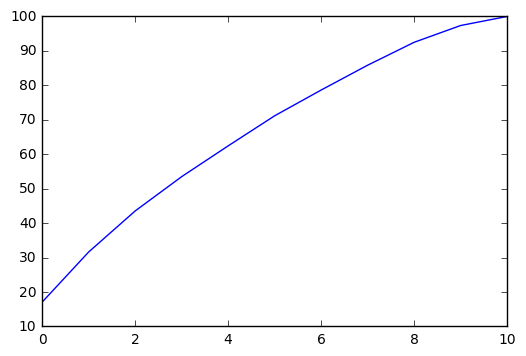

In [66]:
var= pca1.explained_variance_ratio_
%matplotlib inline
var1=np.cumsum(np.round(pca1.explained_variance_ratio_, decimals=4)*100)
print(var1)
plt.plot(var1)

In [67]:
#Looking at above plot I'm taking 9 variables
pca = PCA(n_components=8)
pca.fit(X)
X1=pca.fit_transform(X)

print(X1)

[[-0.72426226  1.45071226  0.04501078 ..., -0.16821809  0.15509859
  -1.16854665]
 [ 0.77043773 -0.21932391 -0.72025797 ..., -0.80634867  0.29594702
   0.81946161]
 [-0.34521523  0.25208386  1.1228868  ...,  0.95958724 -2.77983488
  -0.14887275]
 ..., 
 [ 2.08099158  2.04913186 -0.04258977 ..., -0.61457663  0.42927293
  -1.05087936]
 [ 1.70735727  1.42804062  0.82417179 ..., -1.16732051 -0.00908765
  -0.31903698]
 [-1.62807569  2.17982328  0.53803284 ...,  2.25114006 -1.59398853
   0.87927647]]


In [68]:
models6 = []
models6.append(('LR',LogisticRegression()))
models6.append(('KNN',KNeighborsClassifier()))
models6.append(('SVC',SVC()))
models6.append(('NB',GaussianNB()))
models6.append(('gpc',GaussianProcessClassifier()))
models6.append(('mlp',MLPClassifier()))
models6.append(('TREE',DecisionTreeClassifier()))
models6.append(('FOREST',RandomForestClassifier()))
models6.append(('BAGGING',BaggingClassifier()))
models6.append(('Boost',GradientBoostingClassifier()))
models6.append(('Ada',AdaBoostClassifier()))

train_accuracy6 = []
test_accuracy6 = []
error6 = []
names6 = []
for name,model in models6:
    xtr,xte,ytr,yte = train_test_split(X1,y, test_size=0.3, random_state=0)
    model.fit(xtr,ytr)
    model_pred = model.predict(xte)
    train_accu = model.score(xtr,ytr)
    test_accu = model.score(xte,yte)
    rmse = np.sqrt(mean_squared_error(yte,model_pred))
    train_accuracy6.append(train_accu)
    test_accuracy6.append(test_accu)
    error6.append(rmse)
    names6.append(name)
    print("%s : %f  ,  %f  ,  (%f)" %(name, train_accu, test_accu, rmse))

LR : 0.811856  ,  0.832335  ,  (0.409469)
KNN : 0.819588  ,  0.808383  ,  (0.437741)
SVC : 0.814433  ,  0.832335  ,  (0.409469)
NB : 0.806701  ,  0.820359  ,  (0.423840)
gpc : 0.881443  ,  0.790419  ,  (0.457800)


C:\Users\DHRUBAJIT\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


mlp : 0.822165  ,  0.832335  ,  (0.409469)
TREE : 1.000000  ,  0.742515  ,  (0.507430)
FOREST : 0.989691  ,  0.748503  ,  (0.501495)
BAGGING : 0.987113  ,  0.742515  ,  (0.507430)
Boost : 0.951031  ,  0.760479  ,  (0.489409)
Ada : 0.884021  ,  0.784431  ,  (0.464294)


### 7. KernelPCA

In [88]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=8, kernel='rbf')
vaar = kpca.fit_transform(X)

In [89]:
models7 = []
models7.append(('LR',LogisticRegression()))
models7.append(('KNN',KNeighborsClassifier()))
models7.append(('SVC',SVC()))
models7.append(('NB',GaussianNB()))
models7.append(('gpc',GaussianProcessClassifier()))
models7.append(('mlp',MLPClassifier()))
models7.append(('TREE',DecisionTreeClassifier()))
models7.append(('FOREST',RandomForestClassifier()))
models7.append(('BAGGING',BaggingClassifier()))
models7.append(('Boost',GradientBoostingClassifier()))
models7.append(('Ada',AdaBoostClassifier()))

train_accuracy7 = []
test_accuracy7= []
error7 = []
names7 = []
for name,model in models7:
    xtr,xte,ytr,yte = train_test_split(vaar,y, test_size=0.3, random_state=0)
    model.fit(xtr,ytr)
    model_pred = model.predict(xte)
    train_accu = model.score(xtr,ytr)
    test_accu = model.score(xte,yte)
    rmse = np.sqrt(mean_squared_error(yte,model_pred))
    train_accuracy7.append(train_accu)
    test_accuracy7.append(test_accu)
    error7.append(rmse)
    names7.append(name)
    print("%s : %f  ,  %f  ,  (%f)" %(name, train_accu, test_accu, rmse))

LR : 0.809278  ,  0.826347  ,  (0.416717)
KNN : 0.824742  ,  0.796407  ,  (0.451213)
SVC : 0.788660  ,  0.808383  ,  (0.437741)
NB : 0.809278  ,  0.808383  ,  (0.437741)
gpc : 0.809278  ,  0.826347  ,  (0.416717)


C:\Users\DHRUBAJIT\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


mlp : 0.811856  ,  0.838323  ,  (0.402090)
TREE : 1.000000  ,  0.700599  ,  (0.547176)
FOREST : 0.987113  ,  0.772455  ,  (0.477017)
BAGGING : 0.976804  ,  0.766467  ,  (0.483252)
Boost : 0.966495  ,  0.766467  ,  (0.483252)
Ada : 0.891753  ,  0.790419  ,  (0.457800)


In [24]:
submission = pd.DataFrame({'Loan_ID': idd, 'Loan_Status':test_pred})
sub_checker = {0:'N',1:'Y'}
submission['Loan_Status'] = submission['Loan_Status'].map(sub_checker)

In [25]:
submission.to_csv("newmodel2.csv", index=False)